# Chart & Code for Viz

In [ ]:
# Comprehensive Master Viz
# https://medium.com/@wenzhao.li1989/top-50-matplotlib-visualizations-the-master-plots-with-full-python-code-f4f110611257
# https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#13.-Diverging-Lollipop-Chart-with-Markers
# related dataset
# https://github.com/selva86/datasets

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')

large = 22; med = 16; small = 12
params = {
    'axes.titlesize': large, 
    'legend.fontsize': med, 
    'figure.figsize': (16, 10), 
    'axes.labelsize': med, 
    'axes.titlesize': med, 
    'xtick.labelsize': med,
    'ytick.labelsize': med,
    'figure.titlesize': large
}

plt.rcParams.update(params)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("white")


#Version
print(mpl.__version__)   # > 3.0.0 
print(sns.__version__)  # > 0.9.0
plt.style.available

In [12]:
pd.set_option('display.max_columns', None)

## Correlation
visualize the relationship between 2 or more variables

### 1. Scatter plot

In [19]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

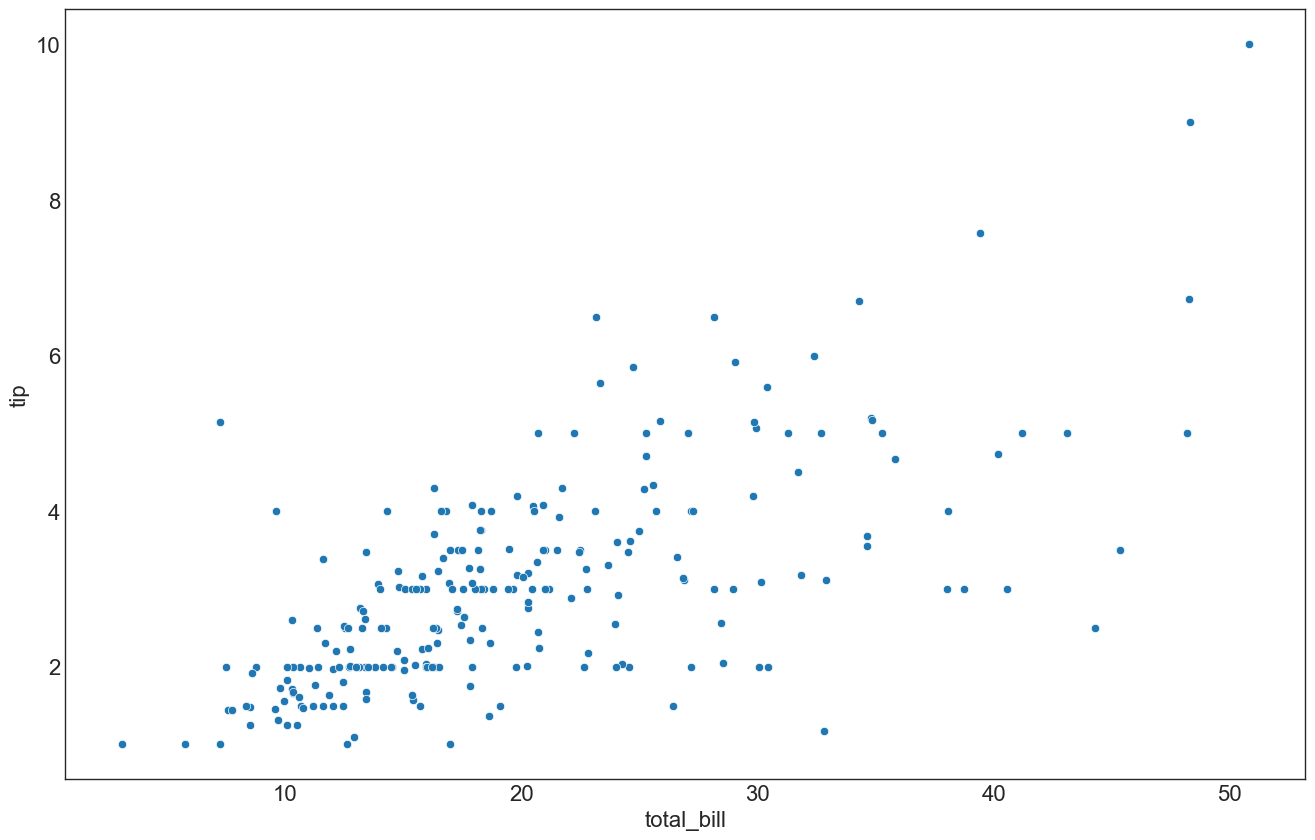

In [21]:
sns.scatterplot(
    data = tips,
    x = 'total_bill',
    y = 'tip'
)

In [25]:
def scatter(data,x,y, 
            hue=None, 
             size=None, 
             sizes=None, 
             legend=None, 
             title=None, 
             fontsize=14, 
             figsize=(12,8)): 
    plt.figure(figsize = figsize)
    sns.scatterplot(
        data=data, x=x, y=y, hue=hue, size=size,sizes=sizes, legend=legend)
    plt.title(title, fontsize=fontsize)

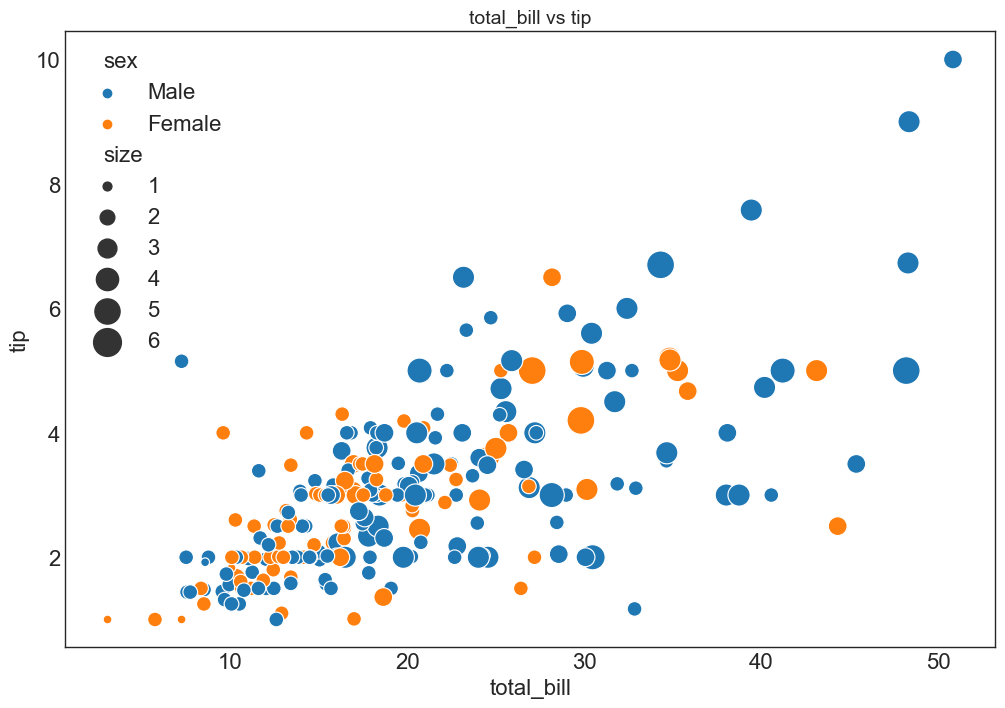

In [34]:
scatter(data=tips, 
        x= 'total_bill', 
        y='tip', 
        hue='sex',
        size='size', 
        sizes =(40,400),
        legend='full', 
        title= 'total_bill vs tip' )

In [35]:
scatter.__defaults__

(None, None, None, None, None, 14, (12, 8))

In [36]:
scatter.__code__.co_varnames

('data',
 'x',
 'y',
 'hue',
 'size',
 'sizes',
 'legend',
 'title',
 'fontsize',
 'figsize')

### 2. Bubble plot with Encircling
show a group of points within a boundary to emphasize their importance

In [45]:
midwest = pd.read_csv('midwest_filter.csv')
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,124,96.712059,2.575276,0.148283,0.376759,0.187623,43298,75.107395,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,9,66.384340,32.900433,0.178807,0.451722,0.084698,6724,59.726353,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,34,96.571276,2.861717,0.233473,0.106731,0.226803,9669,69.334988,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,1139,95.254171,0.412257,0.149322,0.486918,3.697332,19272,75.472188,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,6,90.198766,9.372858,0.239890,0.085675,0.102810,3979,68.861523,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [ ]:
def bubble(data,x,y, circle, circle_value, title, hue=None):
    # As many colors as there are unique midwest['category']
    categories = np.unique(data[hue])
    colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

    # Step 2: Draw Scatterplot with unique color for each category
    fig= plt.figure(figsize=(16, 10), dpi = 88, facecolor='w', edgecolor='k')
    
    for i, category in enumerate(categories):
        plt.scatter(x, y, data=data.loc[data.category==category, :], s ='dot_size', cunp.array(colors[i]).reshape(1,-1), label=str(category),edgecolors='black', linewidths=.5)

    #Step 3: Encircling
    def encircle(x,y, ax=None, **kw):
        if not ax: ax-plt.gca()
        p = np.c_[x,y]
        hull = ConvexHull(p)
        poly = plt.Polygon(p(hull. vertices, :), **kw)
        ax.add_patch(poly)

    #Select data to be encircled
    encircle_data= data.loc[data[circle] == circle_value, :]

    #Draw polygon surrounding vertices
    encircle(encircle_data[x], encircle_data[y], ec="k", fc="gold", alpha=0.1)
    encircle(encircle_data(x), encircle_datal(y), ec="firebrick", fc="none", linewidth=1.5)

    # Step 4: Decorations
    plt.gca().set(xlim (0.0, 0.1), ylim=(0, 90000),
                  xlabel=x, ylabel=y)

    plt.xticks(fontsize=12); plt.yticks(fontsize=12) 
    plt.title(title, fontsize=22)
    plt. legend (fontsize=12)

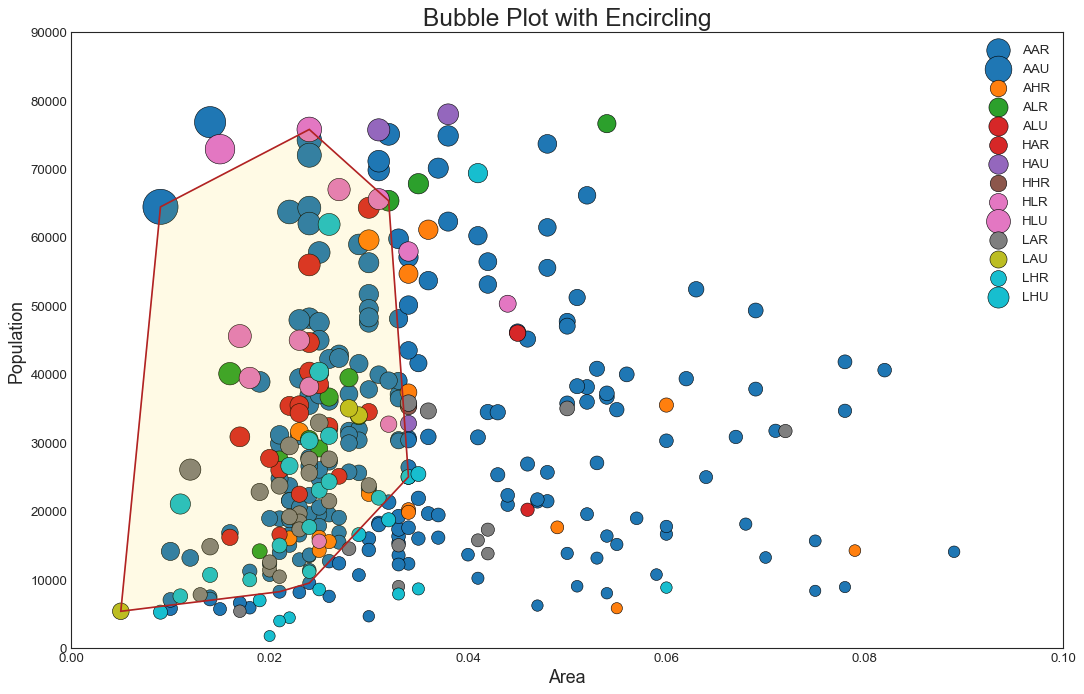

In [59]:
# Step 1: Prepare Data
midwest = pd.read_csv('midwest_filter.csv')

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show() 


#source: https://qinqianshan.com/python/matplotlib/matplotlib-bubble-plot-encircling/

### 3. Scatter plot with linear regression line of best fit

In [60]:
def regplot(data,x,y,
            color ='g',
            fontsize=14,
            figsize=(12,8),
            title=None):
    sns.set_theme(color_codes=True)
    plt.figure(figsize = figsize)
    ax = sns.regplot(x=x, y=y, data=tips, color=color)
    plt.title(title, fontsize=fontsize)

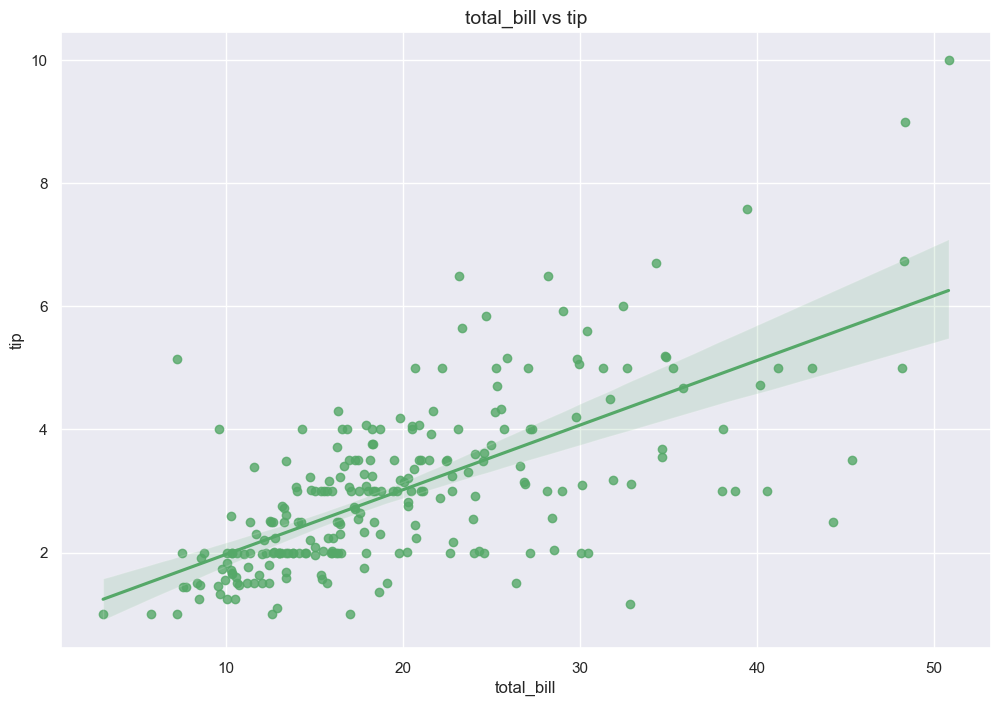

In [61]:
regplot(x='total_bill', y='tip', data=tips, color = 'g', title = 'total_bill vs tip')

### 4. Correllogram

In [62]:
def heatmap(data, figsize = (12,10), title = None, fontsize=14):
    plt.figure(figsize = figsize)
    sns.heatmap(data.corr(), xticklabels = data.corr().columns, yticklabels = data.corr().columns, cmap = 'RdYlGn',
    center = 0, annot = True)
    plt.title(title, fontsize=fontsize)

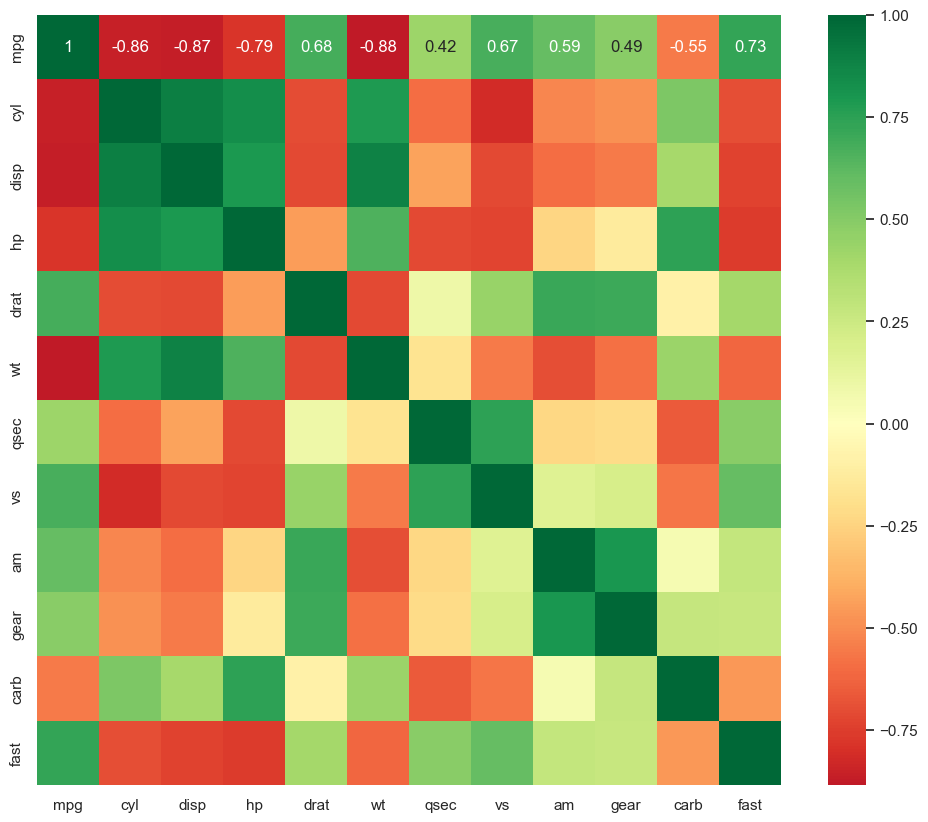

In [65]:
df = pd.read_csv('mtcars.csv')
heatmap(df)

### 5.Pairwise Plot

In [75]:
def heatmap(data, figsize = (12,10), title = None, fontsize=14):
    plt.figure(figsize = figsize, hue=hue)
    sns.pairplot(data, kind = 'scatter', hue=hue, plot_kws = dict(s=80, edgecolor='white', linewidth=2.5))
    plt.title(title, fontsize=fontsize)

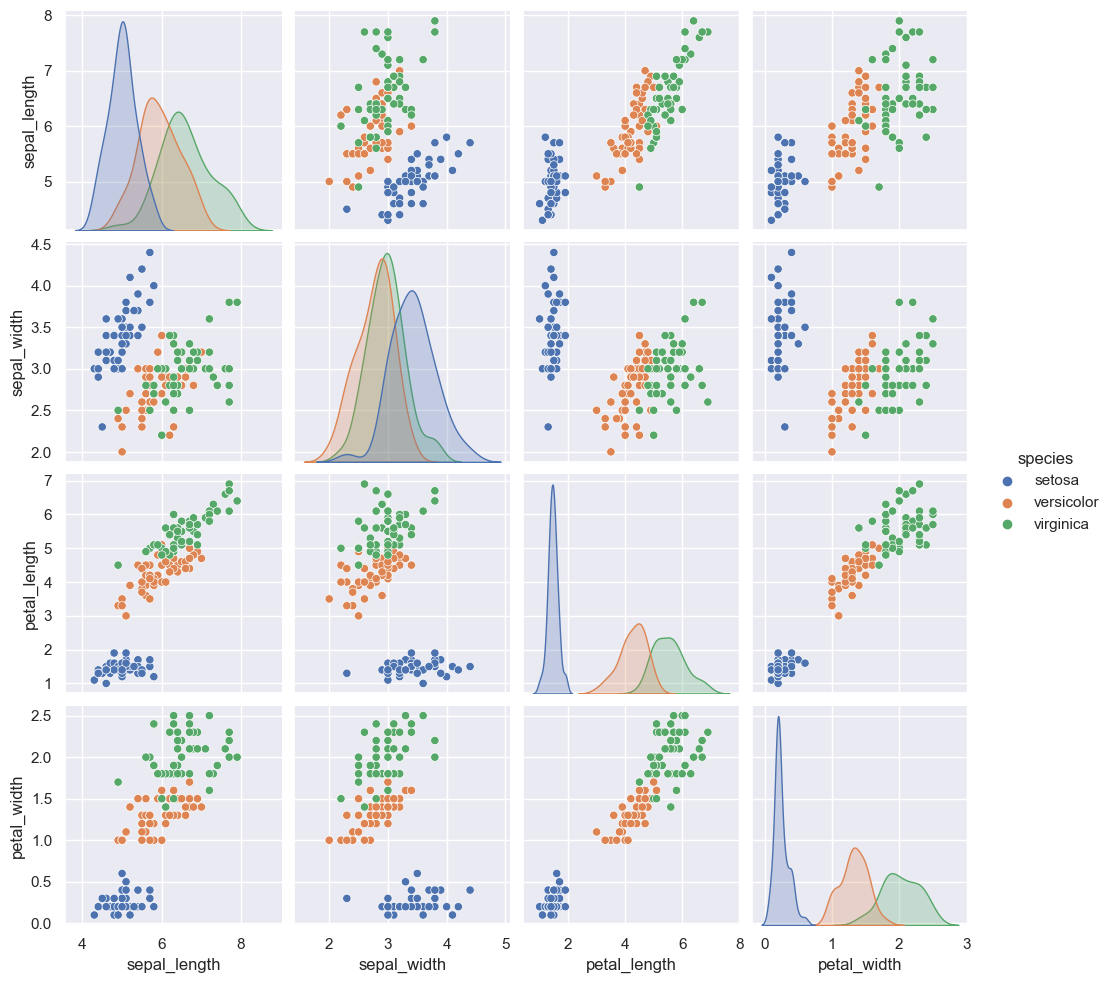

In [80]:
df = sns.load_dataset('iris')
sns.pairplot(data=df, hue="species")

## Deviation

### 1. Diverging Bars

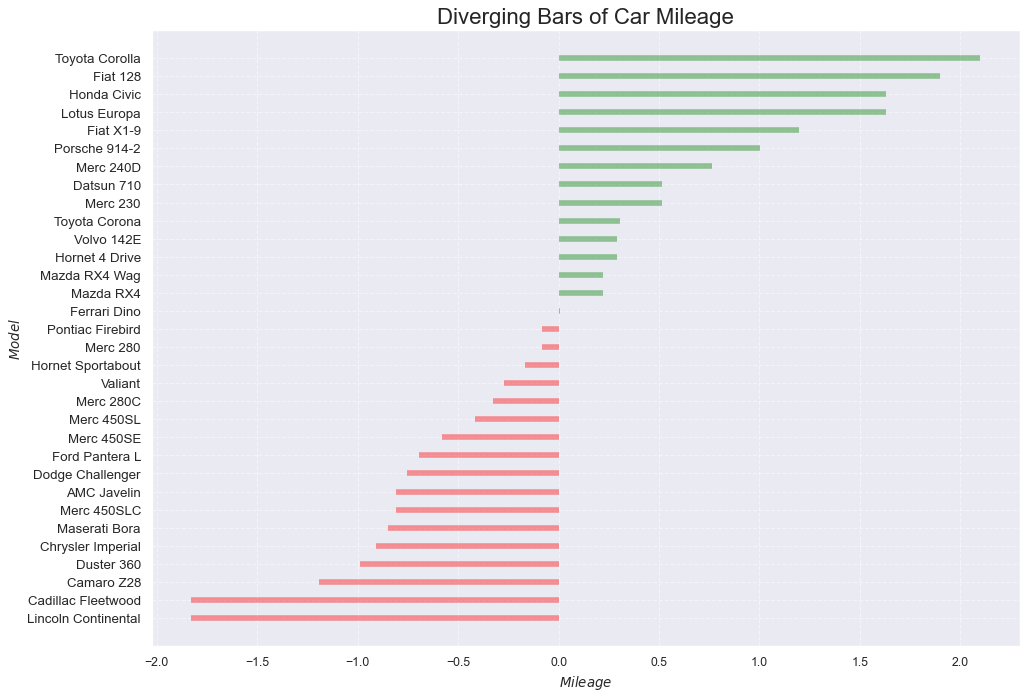

In [82]:
# Prepare Data
df = pd.read_csv("mtcars_org.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Ranking

In [84]:
def barplot(data,x,y, order=None, hue=None, figsize=(12,10), title=None, fontsize=14):
    plt.figure(figsize = figsize)
    sns.barplot(x=x, y=y, data=data, order=order, hue=hue)
    plt.title(title, fontsize=fontsize)

In [87]:
tips = sns.load_dataset('tips')

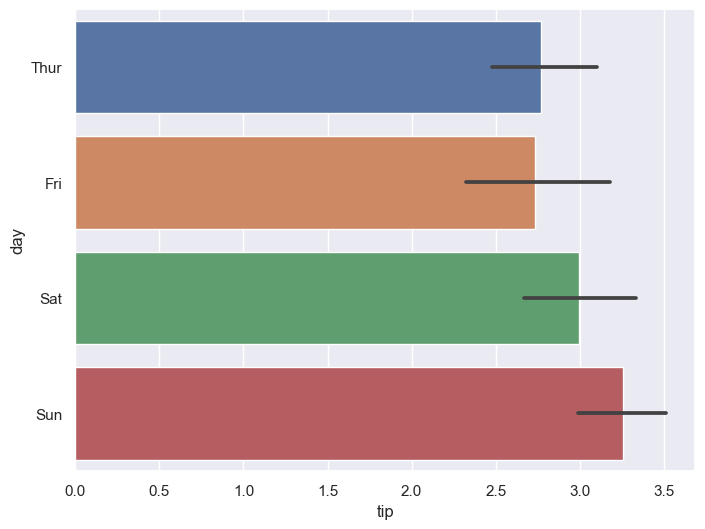

In [88]:
barplot(x='tip',y='day', data=tips, figsize=(8,6))

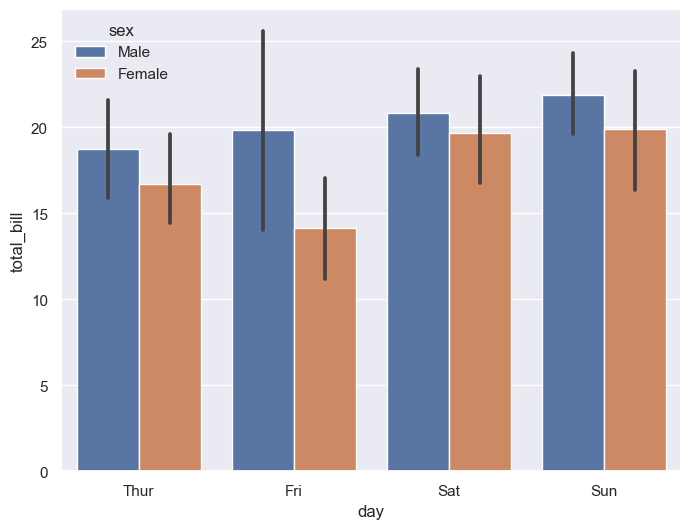

In [89]:
barplot(x='day', y='total_bill', hue='sex', data=tips, figsize=(8,6))

In [91]:
# Prepare Data
df_raw = pd.read_csv('mpg_ggplot2.csv')
df = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
df.head()

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000


In [94]:
def lollipop_bar(data,xaxis,y, title=None, ylabel=None):
    # Draw plot
    fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
    ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
    ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)
    
    # Title, Label, Ticks and Ylim
    ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
    ax.set_ylabel('Miles Per Gallon')
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
    ax.set_ylim(0, 30)
    
    # Annotate
    for row in df.itertuples():
        ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
    
    plt.show()

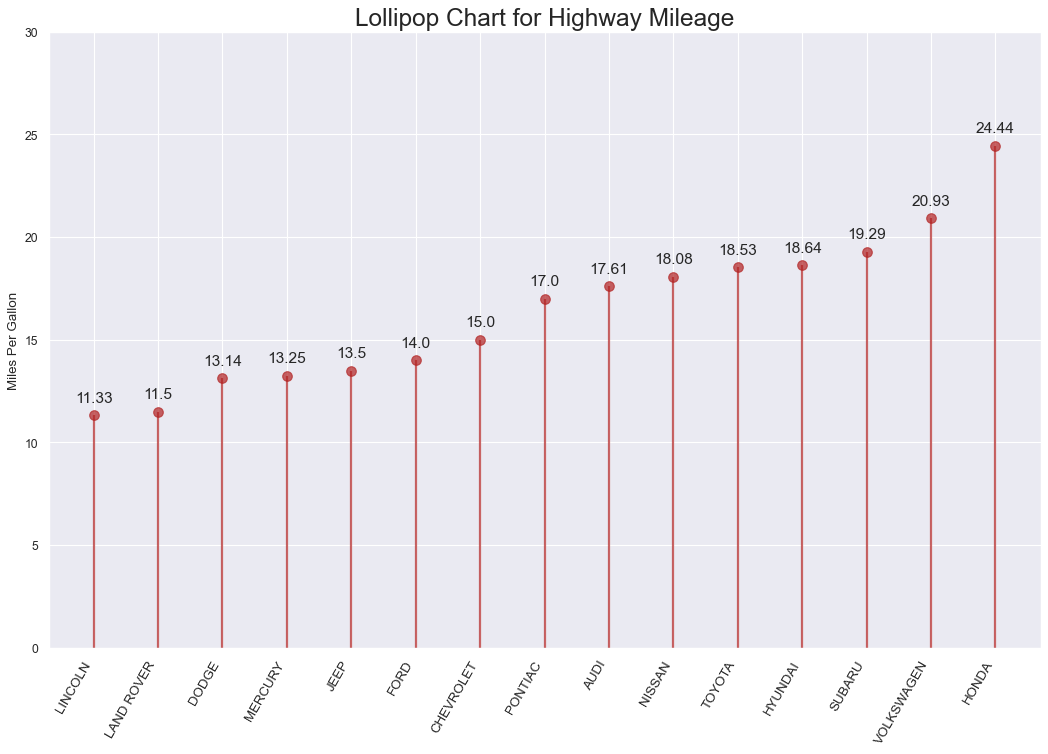

In [95]:
df_raw = pd.read_csv('mpg_ggplot2.csv')
df = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
lollipop_bar(data=df,xaxis='manufacturer', y='cty',title=None, ylabel=None)

## Slope Chart

In [96]:
def before_after(data,x1,x2,y, title=None, ylabel=None, ytick=None):
    import matplotlib.lines as mlines
    # Import Data
    df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")
    
    left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
    right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
    klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]
    
    # draw line
    # https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
    def newline(p1, p2, color='black'):
        ax = plt.gca()
        l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
        ax.add_line(l)
        return l
    
    fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)
    
    # Vertical Lines
    ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
    ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
    
    # Points
    ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
    ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)
    
    # Line Segmentsand Annotation
    for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
        newline([1,p1], [3,p2])
        ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
        ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})
    
    # 'Before' and 'After' Annotations
    ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
    ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})
    
    # Decoration
    ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
    ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
    ax.set_xticks([1,3])
    ax.set_xticklabels(["1952", "1957"])
    plt.yticks(np.arange(500, 13000, 2000), fontsize=12)
    
    # Lighten borders
    plt.gca().spines["top"].set_alpha(.0)
    plt.gca().spines["bottom"].set_alpha(.0)
    plt.gca().spines["right"].set_alpha(.0)
    plt.gca().spines["left"].set_alpha(.0)
    plt.show()

In [97]:
df = pd.read_csv('gdppercap.csv')
df.head()

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


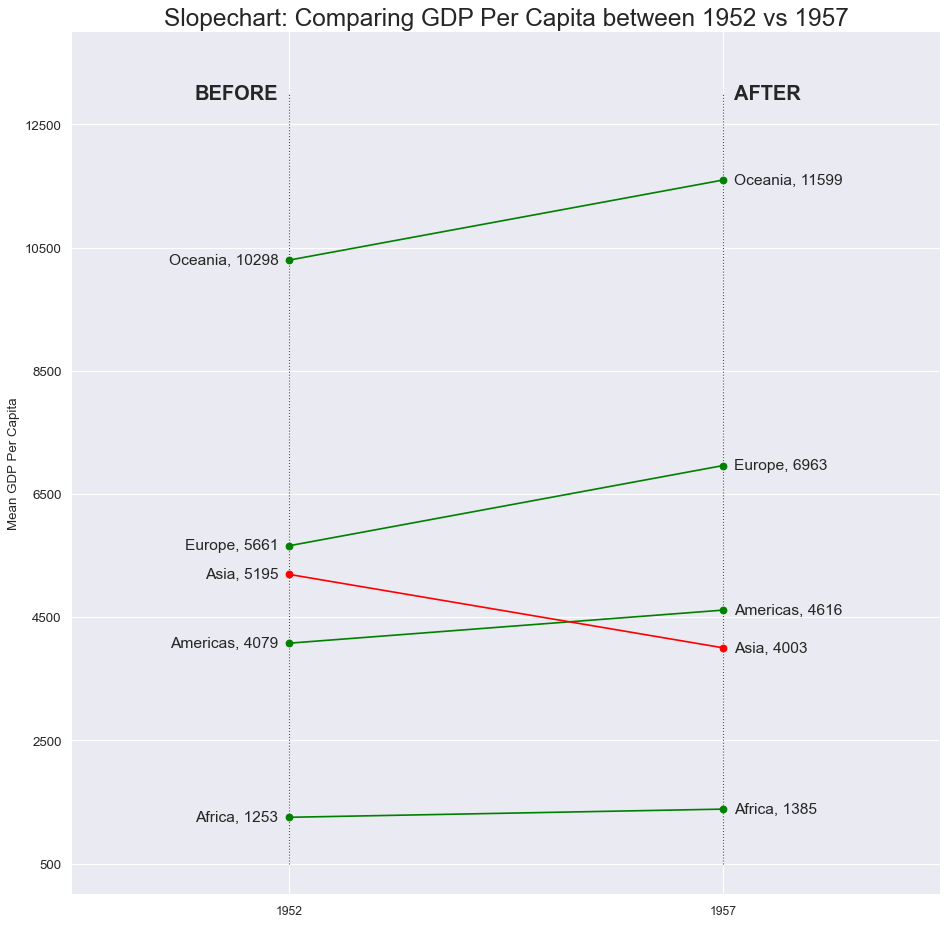

In [98]:
before_after(
    data=df,x1='1952',x2='1957',y='continent',
    title = 'Slopechart: Comparing GDP Per Capita between 1952 and 1957',
    ylabel='Mean GDP Per Capita',ytick=None
)